In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab10B.ipynb")

---

<h3><center>E7 -  Introduction to Programming for Scientists and Engineers</center></h3>

<h2><center>Lab session #10-B <br></center></h2>

<h1><center>Systems of linear equations<br></center></h1>

---

In [2]:
from resources.hashutils import *
import numpy as np
import matplotlib.pyplot as plt

# Question 1: Temperature distribution on a square plate

A scientific experiment requires that the temperature distribution on a thin square metalic plate be carefully monitored. However the physical constraints of the experiment only allow that temperature sensors be placed at the four corners of the plate (red nodes in the figure below). To deal with this problem, the researchers have decided to *estimate* the temperatures at the remaining 12 points on a 4x4 grid (white nodes in the figure), by assuming that the temperature of any unmeasured node is the average of its immediate neighbors. So for example, 

+ the temperature at node 1 equals the average of the temperatures of nodes 0, 2, and 5.
+ the temperature at node 5 equals the average of the temperatures of nodes 4, 1, 6, and 9.

Note that this is only true for white nodes; the temperatures at red nodes are given and may not follow this rule. 

In this exercise we use the tools of linear algebra to compute the twelve missing temperatures. 

<img src="resources/grid.png" width="400" />


## Question 1.1: Node coordinate to index map

Each node is identified either by its coordinates (e.g. (2,1)) or by its index (e.g 9). These are shown in the figure. The coordinate labels appear next to the node, while the indexes are inside the node. Both of these identifiers will be useful, and hence we need to translate between the two. 

Write two functions, called `coord2index(coord)` and `index2coord(index)`, which respectively translate from a node's coordinate to its index and vice-versa. 

+ `coord2index(coord)` takes a tuple and returns an integer.
+ `index2coord(index)` takes an integer and returns a tuple. 

**Hint**: While it is possible to write these functions using long if-elif clauses, it is also possible to do it with a single line of code. Please try to do that.

In [3]:
def coord2index(coord):
    return np.array([[0,1,2,3],[4,5,6,7],[8,9,10,11],[12,13,14,15]])[coord]

def index2coord(index):
    return np.where(np.array([[0,1,2,3],[4,5,6,7],[8,9,10,11],[12,13,14,15]])==index)

In [4]:
grader.check("q1p1")

q1p1 results: All test cases passed!

## Question 1.2: Measured and unmeasured nodes

Create two Python lists:
+ `nodes_measured` containing the indexes of measured nodes, and
+ `nodes_unmeasured` containing the indexes of unmeasured nodes.

Each of these lists should be in ascending order. 

**Note**: We are using native lists and not NumPy arrays for the indexes because we will not perform significant mathematical operations on these lists.

In [60]:
nodes_measured = [0,3,12,15]
nodes_unmeasured = [1,2,4,5,6,7,8,9,10,11,13,14]

In [6]:
grader.check("q1p2")

q1p2 results: All test cases passed!

## Question 1.3: Dictionary of measured temperatures

Create a dictionary called `index2temp` whose keys are the indexes of measured nodes, and whose values are their respective temperatures (shown in the figure).

In [7]:
index2temp = {0:10,3:52,12:20,15:120}

In [8]:
grader.check("q1p3")

q1p3 results: All test cases passed!

## Question 1.4: Get a node's neighbors

Create a function called `get_neighbors(index)` that, for a given node index, returns a Python *set* containing the indexes of its neighbors.
This set will have 4 elements if the node is an interior node, 3 if it is a boundary node, and 2 if it is a corner node.

In [9]:
def get_neighbors(index):
    row, col = index2coord(index)
    neighbors = set()
    if index == 0:
        neighbors = (index+1,index+4)
    if index == 3:
        neighbors = (index-1,index+4)
    if index == 12:
        neighbors = (index-4,index+1)
    if index == 15:
        neighbors = (index-4,index-1)
    if index in(1,2):
        neighbors =(index-1,index+1,index+4)
    if index in (5,6,9,10):
        neighbors = (index-4,index-1,index+1,index+4)
    if index in (4,8):
        neighbors = (index-4,index+1,index+4)
    if index in (7,11):
        neighbors = (index-4,index-1,index+4)
    if index in (13,14):
        neighbors = (index-4,index-1,index+1)
    return set(neighbors)

In [10]:
grader.check("q1p4")

q1p4 results: All test cases passed!

## Question 1.5: Initialize `A` and `b`

To solve the system of linear equations in code we must first put it into the matrix form $Ax=b$. Here $A$ is a square 12x12 matrix and $b$ is a column matrix of size 12x1. In this part we initialize these matrices with zeros. In the next part we will fill in the non-zero entries. 

Create two 2D NumPy arrays called `A` and `b`, both of the approprate size and containing only zeros. 

In [11]:
A = np.zeros((12,12))
b = np.zeros((12,1))

In [12]:
grader.check("q1p5")

q1p5 results: All test cases passed!

## Question 1.6: Populate `A` and `b`

The system of equations to solve has 12 unknowns (the 12 unmeasured temperatures) and 12 equations. Each of the equations determines the temperature of an unmeasured node as the average of its neighbors. For example, for node 5 we have:

\begin{equation*}
T_5 = \frac{1}{4}\Bigl( T_1 + T_4 + T_6 + T_9 \Bigr)
\end{equation*}

Or equivalently, 

\begin{equation*}
T_5 - \frac{1}{4}\Bigl( T_1 + T_4 + T_6 + T_9 \Bigr) = 0
\end{equation*}

Here $T_q$ is the temperature at the node with index $q$. 
For boundary nodes, one of the temperatures in the formula is given, and therefore should remain on the right hand side of the equation. For example, for node 4:

\begin{equation*}
T_4 - \frac{1}{3}\Bigl( T_5 + T_8 \Bigr) = \frac{1}{3} T_0
\end{equation*}

To organize these equations into the matrix form $Ax=b$, we define the vector of unknown temperatures $x\in\mathbb{R}^{12}$ in the order given by `nodes_unmeasured`:

\begin{equation*}
\begin{bmatrix}x_0\\x_1\\x_2\\x_3\\ \vdots\\x_{11}\end{bmatrix} = \begin{bmatrix}T_1\\T_2\\T_4\\T_5\\ \vdots\\T_{14}\end{bmatrix}
\end{equation*}

Then, the equation shown above for nodes 4 and 5 appear respectively in the third and fourth rows of $A$:

<img src=resources/eqns.png width=700>

Your task is to write code that will fill in all of the rows of `A` and `b` in accordance with the 12 averaging equations for the 12 unmeasured nodes. Below we provide a template code for doing this, with instructions. However we also recommend that you try doing it on your own before looking at the template. 

**Hint**
+ You should always re-run the initialization from part 1.5 when running this code. To save time and avoid mistakes, you should copy the initialization code into this part. 

In [32]:
A = np.zeros((12,12))
b = np.zeros((12,1))
for i, index in enumerate(nodes_unmeasured):
    

    # Use `get_neighbors` to get the set of neighbors surrounding the node.
    neighbors = get_neighbors(index)
    
    # num_neighbors is the number of neighbors for this node
    num_neighbors = len(neighbors)

    # Every row has a 1 in the i'th column
    A[i,i]=1

    # Iterate through the node indexes of the neighbors
    for nindex in neighbors:
        if nindex in nodes_unmeasured:
            ni=nodes_unmeasured.index(nindex)
            A[i,ni] = -1/num_neighbors

        # If this neighbor is unmeasured, it appears on the left-hand side of the equation (in A).
        # Assign the value for the i'th row and ni'th column of A to -1/num_neighbors, where ni is position 
        # of nindex in nodes_unmeasured. (Hint: list.index)
        if nindex in nodes_measured:
            b[i]= index2temp[nindex]/num_neighbors
        
        # If this neighbor is measured, it appears on the right-hand side of the equation (in b).
        # Assign the value for the i'th row of b to the measured temperature divided by num_neighbors.

In [33]:
grader.check("q1p6")

q1p6 results: All test cases passed!

## Question 1.7: Check the ranks of $A$ and $(A|b)$

In lecture we covered conditions involving the rank of $A$ and the rank of the extended matrix $(A|b)$ for determining whether a system of linear equations has 0, 1, or infinitely many solutions.  Compute the ranks of these matrices using [np.linalg.matrix_rank](https://numpy.org/doc/stable/reference/generated/numpy.linalg.matrix_rank.html) and [np.hstack](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html), and assign them to `rankA` and `rankAb`. Then observe the values that you got and assign to `num_solutions` the number of solutions that problem should have (0, 1, or [np.inf](https://numpy.org/devdocs/reference/constants.html#numpy.inf))

In [38]:
rankA = np.linalg.matrix_rank(A)
rankAb = np.linalg.matrix_rank(np.hstack((A,b)))
num_solutions = 1

In [39]:
grader.check("q1p7")

q1p7 results: All test cases passed!

## Question 1.8: Solve for $x$

Given what was found in part 1.7, we can assert that the unique solution to the problem is given by:
\begin{equation*}
x = A^{-1}b
\end{equation*}

Write code to find this value of `x`.

**Hints**:
+ [`np.matmul`](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html), or equivalently the `@` operator.
+ [`np.linalg.inv`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html)


In [40]:
x = np.linalg.inv(A)@b

In [41]:
grader.check("q1p8")

q1p8 results: All test cases passed!

## Question 1.9: Compute T

Organize the measured and unmeasured (but now computed) temperature values into a 4x4 matrix called `T`. The row and column indices for the entries of `T` are simply the coordinates of the nodes from the initial figure.

In [73]:
T = np.zeros((4,4))
for index in np.arange(0,16):
    coord = index2coord(index)
    if index in nodes_measured:
        T[coord] = index2temp[index]
    if index in nodes_unmeasured:
        T[coord] = x[nodes_unmeasured.index(index)]
            

In [74]:
grader.check("q1p9")

q1p9 results: All test cases passed!

## Plot

The next cell generates a surface plot of the temperatures across the plate. This part is not graded, it is simply so that you can see the result. You can add `%matplotlib widget` to the cell if you want to rotate the plot, but remember to remove that line before submitting, or else it will confuse the autograder. 

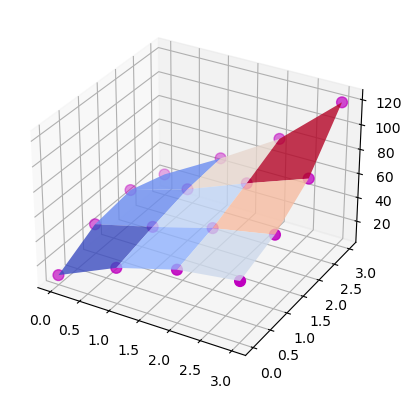

In [75]:
rows, cols = np.meshgrid(range(4),range(4))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(rows, cols,T,marker='o',c='m',s=60)
ax.plot_surface(rows, cols,T,cmap='coolwarm',alpha=0.8)

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [76]:
grader.check_all()

q1p1 results: All test cases passed!

q1p2 results: All test cases passed!

q1p3 results: All test cases passed!

q1p4 results: All test cases passed!

q1p5 results: All test cases passed!

q1p6 results: All test cases passed!

q1p7 results: All test cases passed!

q1p8 results: All test cases passed!

q1p9 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Make sure you submit the .zip file to Gradescope.

In [77]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)